<a href="https://colab.research.google.com/github/zhChenOuO/stock_ml_exercise/blob/master/03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install finlab_crypto > log.txt
!pip install talib-binary > log.txt

In [8]:
import finlab_crypto
finlab_crypto.setup()

In [9]:
ohlcv = finlab_crypto.crawler.get_all_binance("BTCUSDT",'1h')

All caught up..!


# MMI Filter

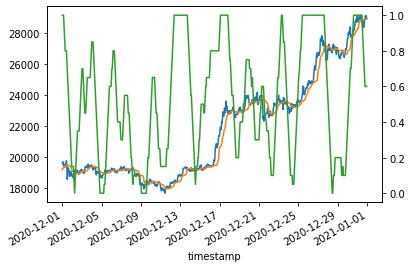

In [ ]:
median = ohlcv.close.rolling(20).median()

p1 = ohlcv.close > median
p2 = ohlcv.close.shift() > median

mmi = (p1 & p2).astype(int).rolling(20).mean()

ohlcv.close['2020-12'].plot()
median['2020-12'].plot()
mmi['2020-12'].plot(secondary_y = True)

  0%|          | 0/464 [00:00<?, ?it/s]

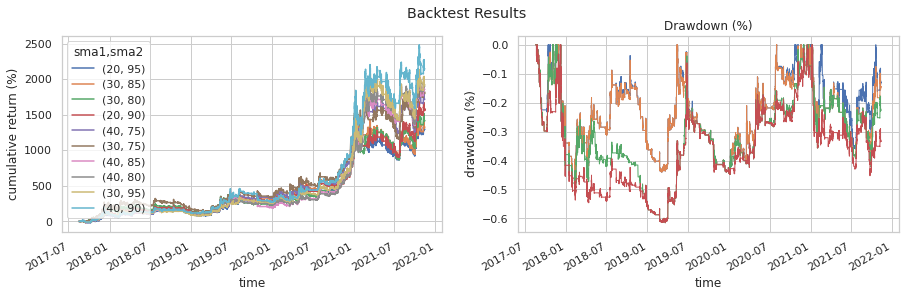

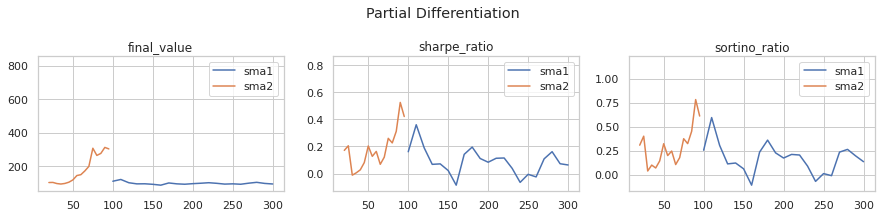

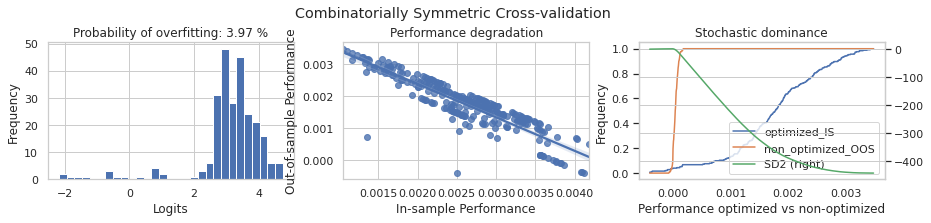

Output()

In [8]:
from finlab_crypto import Strategy
import numpy as np


@Strategy(sma1=20,sma2=60)
def mmi_sma_strategy(ohlcv):
  close = ohlcv.close
  sma20 = close.rolling(mmi_sma_strategy.sma1).mean()
  sma60 = close.rolling(mmi_sma_strategy.sma2).mean()

  entries = (sma20 > sma60) & (sma20.shift() < sma60.shift())
  exits = (sma20 < sma60) & (sma20.shift() > sma60.shift())

  figures = {
      'overlaps':{
          'sma20':sma20,
          'sma60':sma60
      }
  }

  median = ohlcv.close.rolling(20).median()
  p1 = ohlcv.close > median
  p2 = ohlcv.close.shift() > median
  mmi = (p1 & p2).astype(int).rolling(20).mean()

  entries = entries & (mmi > 0.5)

  return entries,exits,figures

variables = {
    'sma1':np.arange(20,310,10),'sma2':np.arange(20,100,5)
}
portfolio = mmi_sma_strategy.backtest(ohlcv,variables=variables, freq='1h', plot=True)

In [12]:
from finlab_crypto.strategy import Filter
from finlab_crypto import Strategy

@Filter(timeperiod=20)
def mmi_filter(ohlcv): 
  median = ohlcv.close.rolling(mmi_filter.timeperiod).median()
  p1 = ohlcv.close > median
  p2 = ohlcv.close.shift() > median
  mmi = (p1 & p2).astype(int).rolling(mmi_filter.timeperiod).mean()
  
  figures = {
      'figures':{
          'mmi_index': mmi
      }
  }
  return  mmi > 0.5, figures

f40 = mmi_filter.create({'timeperiod':60})
f40(ohlcv)

(timeperiod                    60
 timestamp                       
 2017-08-17 04:00:00+00:00  False
 2017-08-17 05:00:00+00:00  False
 2017-08-17 06:00:00+00:00  False
 2017-08-17 07:00:00+00:00  False
 2017-08-17 08:00:00+00:00  False
 ...                          ...
 2021-11-14 12:00:00+00:00  False
 2021-11-14 13:00:00+00:00  False
 2021-11-14 14:00:00+00:00  False
 2021-11-14 15:00:00+00:00  False
 2021-11-14 16:00:00+00:00  False
 
 [37087 rows x 1 columns], {'figures': {'mmi_index': timestamp
   2017-08-17 04:00:00+00:00         NaN
   2017-08-17 05:00:00+00:00         NaN
   2017-08-17 06:00:00+00:00         NaN
   2017-08-17 07:00:00+00:00         NaN
   2017-08-17 08:00:00+00:00         NaN
                                  ...   
   2021-11-14 12:00:00+00:00    0.316667
   2021-11-14 13:00:00+00:00    0.333333
   2021-11-14 14:00:00+00:00    0.350000
   2021-11-14 15:00:00+00:00    0.350000
   2021-11-14 16:00:00+00:00    0.350000
   Name: close, Length: 37087, dtype: floa

  0%|          | 0/841 [00:00<?, ?it/s]

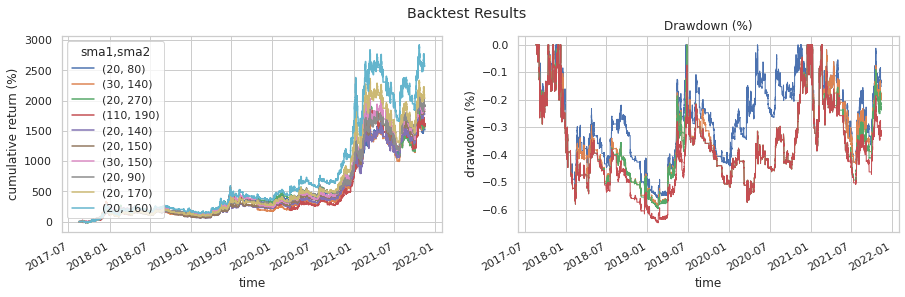

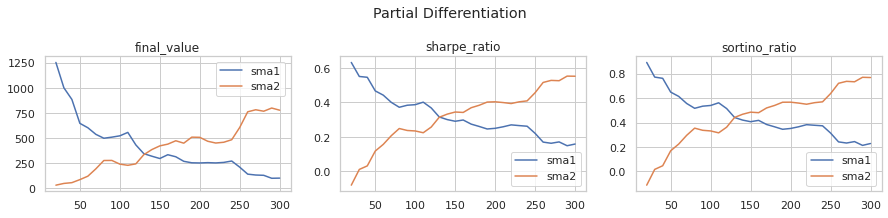

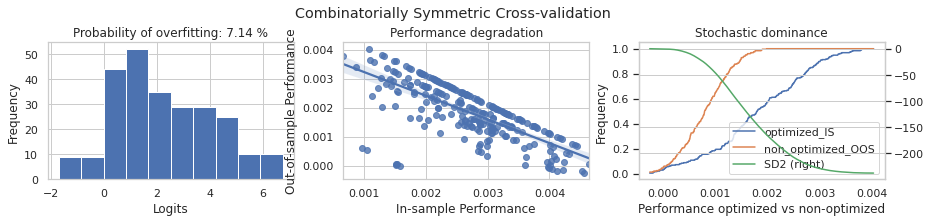

Output()

In [13]:
@Strategy(sma1=20,sma2=60)
def sma_strategy(ohlcv):
  close = ohlcv.close
  sma20 = close.rolling(sma_strategy.sma1).mean()
  sma60 = close.rolling(sma_strategy.sma2).mean()

  entries = (sma20 > sma60) & (sma20.shift() < sma60.shift())
  exits = (sma20 < sma60) & (sma20.shift() > sma60.shift())

  figures = {
      'overlaps':{
          'sma20':sma20,
          'sma60':sma60
      }
  }
  return entries,exits,figures

variables = {
    'sma1':np.arange(20,310,10),'sma2':np.arange(20,310,10)
}
portfolio = sma_strategy.backtest(ohlcv,variables=variables, freq='4h', plot=True)

In [ ]:
import numpy as np

variables = {'sma1':np.arange(20,100,5),'sma2':np.arange(20,300,5)}
f_mmi = mmi_filter.create({'timeperiod':np.arange(10,50,5 )})
portfolio = sma_strategy.backtest(ohlcv,variables=variables,filters={'mmi':f_mmi}, freq='1h',plot=True)

  0%|          | 0/896 [00:00<?, ?it/s]

In [ ]:
variables = {'sma1':35,'sma2':90}
f_mmi = mmi_filter.create({'timeperiod':17})
portfolio = sma_strategy.backtest(ohlcv,variables=variables,filters={'mmi':f_mmi}, freq='1h',plot=True)